In [ ]:
! pip install pystan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [ ]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
quarter=['Q1','Q2','Q3','Q4']
n=df['Quarter'][0]
n[0:2]

'Q1'

In [ ]:
for i in range(42):
    n=df['Quarter'][i]
    df['Quarter'][i]=n[0:2]

<ipython-input-37-6f0e3aac1aff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'][i]=n[0:2]


In [ ]:
dummy=pd.DataFrame(pd.get_dummies(df['Quarter']))

In [ ]:
coco=pd.concat((df,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

In [ ]:
log_Sales= np.log(coco['Sales'])
coco['log_Sales']=log_Sales

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
coco['Quarter']= coco['Quarter'].map({'Q1':1,'Q2':2,'Q3':3,'Q4':4})

In [ ]:
coco['Q1']=coco['Q1'].astype(int)
coco['Q2']=coco['Q2'].astype(int)
coco['Q3']=coco['Q3'].astype(int)
coco['Q4']=coco['Q4'].astype(int)
coco['Sales']=coco['Sales'].astype(int)
coco['log_Sales']=coco['log_Sales'].astype(int)

In [ ]:
X = coco.drop(['Sales'],axis =1)
y = coco['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 8)
(14, 8)
(28,)
(14,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([3374.34116366, 2559.446945  , 1754.88908544, 3420.31621383,
       1691.87729931, 4586.92840507, 2480.66251874, 3759.35702878,
       3820.66560652, 2310.72961963, 3155.8773134 , 1879.23498186,
       2760.46047928, 2419.76752102])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

In [ ]:
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(mean_squared_log_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.962803630662015
25684.25852583892
0.003857311015844891
139.5855407230765


<Axes: >

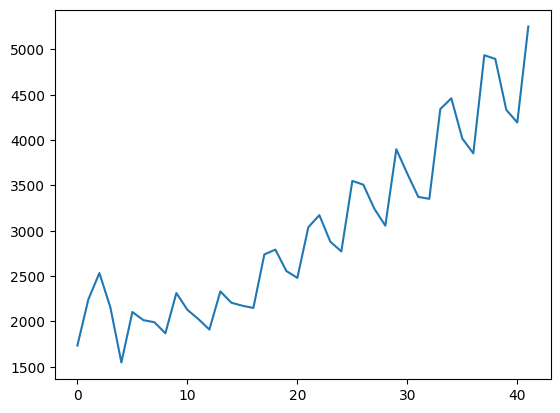

In [ ]:
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

In [ ]:
import statsmodels.formula.api as smf
#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

421.0462030856795

In [ ]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.62017433775907

In [ ]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

1208.6959514532523

In [ ]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1860.381719036362

In [ ]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

38    4292.418129
39    4066.751462
40    3961.937719
41    4639.437719
dtype: float64

In [ ]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear


464.83996442094985

In [ ]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad


301.7945975296036

In [ ]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

3050.7433589175266

In [ ]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

1139.1923015428836

In [ ]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

388.34602284194784

In [ ]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,388.346023
1,rmseadd,1860.381719
2,rmseaddlinear,464.839964
3,rmseaddquad,301.794598
4,rmseexpo,1208.695951
5,rmselin,421.046203
6,rmsemul,3050.743359
7,rmsemulin,1139.192302
8,rmsequad,475.620174
